<h1>PCA</h1>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, Binarizer, KernelCenterer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['font.family'] = 'DejaVu Sans'
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from tqdm import tqdm_notebook as tqdm
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import validation_curve, learning_curve, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
RANDOM_STATE = 78
import warnings
warnings.filterwarnings('ignore')

<h3>Attempting PCA with Different Standardization Methods</h3>

In [ ]:
pca = PCA().fit(x_train)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 300)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axhline(0.9, c='c')
plt.titke
plt.show()

In [ ]:
#Standardising Train and Test data

#Standard Scaler
sc0 = StandardScaler()
X_train0 = sc0.fit_transform(x_train)
X_test0 = sc0.transform(x_test)

#Robust Scaler
sc1 = RobustScaler()
X_train1 = sc1.fit_transform(x_train)
X_test1 = sc1.transform(x_test)

#Binarizer
sc2 = Binarizer()
X_train2 = sc2.fit_transform(x_train)
X_test2 = sc2.transform(x_test)

#Kernel Centerer
sc3 = KernelCenterer()
X_train3 = sc3.fit_transform(x_train)
X_test3 = sc3.transform(x_test)

In [ ]:
#Plot function
def plot_pca_train(X0, X1, X2, X3, y_train):
    fig, ax = plt.subplots(2, 2, figsize = (24, 24))
    pca = PCA(n_components=0.9)
    X_reduced0 = pca.fit_transform(X0)
    X_reduced1 = pca.fit_transform(X1)
    X_reduced2 = pca.fit_transform(X2)
    X_reduced3 = pca.fit_transform(X3)
    ax[0,0].scatter(X_reduced0[:, 0], X_reduced0[:, 1], c=y_train,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('bwr', 2))
    ax[0,0].set_title('PCA projection StdScalar')
    ax[1,0].scatter(X_reduced1[:, 0], X_reduced1[:, 1], c=y_train,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('bwr', 2))
    ax[1,0].set_title('PCA projection Robust')
    ax[0,1].scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=y_train,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('bwr', 2))
    ax[0,1].set_title('PCA projection Binarizer')
    ax[1,1].scatter(X_reduced3[:, 0], X_reduced3[:, 1], c=y_train,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('bwr', 2))
    ax[1,1].set_title('PCA projection KernelCenterer')
    print(pca.n_components_)

In [ ]:
#For Standardized Training Data
plot_pca_train(X_train0, X_train1, X_train2, X_train3, y_train)

<h4>Since, all methods of standardization lead to the same distribution, we will resort to Standard Scaler</h4>

In [ ]:
pca = PCA(n_components=0.9)
pca.fit(X_train0)
print("Train Shape : ",X_train0.shape)
print("Test Shape",X_test0.shape)
print("PCA Variance Ratio",pca.explained_variance_ratio_)
X = pca.transform(X_train0)
transformed_test = pca.transform(X_test0)
kf = KFold(n_splits=10)

scores = [] 
best_param = {'C': 0.11248300958542848, 'class_weight': 'balanced', 'max_iter': 50000, 'n_jobs': -1, 'penalty': 'l1', 'random_state': 78, 'solver': 'liblinear'}
#K-fold Validation 
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y_train[train_index], y_train[test_index]
    model = LogisticRegression(C=0.1, class_weight='balanced', dual=False,fit_intercept=True, intercept_scaling=1, max_iter=100,multi_class='warn', n_jobs=None, penalty='l1', random_state=0,solver='warn', tol=0.0001, verbose=0, warm_start=False);
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    scores.append(score)
print("Average Train Accuracy: ", sum(scores)*100/10, "%")
model.fit(X, y_train)
predictions = model.predict(transformed_test)

#writing results to csv
write_csv(predictions,'PCA')

<h3>Test Score obtained on Kaggle after PCA :</h3>

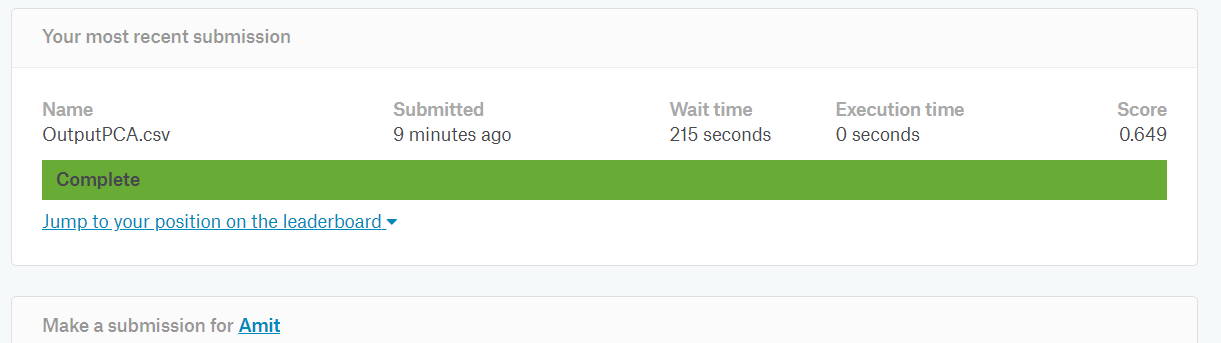